<a href="https://colab.research.google.com/github/le-incroyable1-dev/tinker_with_Tensorflow/blob/main/MNIST_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4973 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3755 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3365 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2956 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2825 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2692 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2577 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2474 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3409 - accuracy: 0.8773 - 379ms/epoch - 1ms/step

Test accuracy: 0.8773000240325928


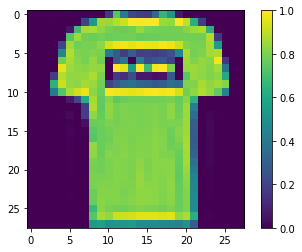

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


[[0.984313725490196, 0.9764705882352941, 0.9764705882352941, 0.9372549019607843, 0.9921568627450981, 0.996078431372549, 0.9647058823529412, 0.9803921568627451, 0.996078431372549, 0.9882352941176471, 0.9882352941176471, 1.0, 0.9882352941176471, 0.9607843137254902, 0.9607843137254902, 0.9803921568627451, 0.9450980392156862, 0.9882352941176471, 0.984313725490196, 0.9764705882352941, 1.0, 0.9882352941176471, 0.9647058823529412, 0.996078431372549, 1.0, 1.0, 1.0, 1.0], [0.9882352941176471, 0.9882352941176471, 0.9882352941176471, 0.9882352941176471, 1.0, 0.9529411764705882, 0.9607843137254902, 1.0, 0.9372549019607843, 0.9647058823529412, 0.9725490196078431, 0.9607843137254902, 0.9686274509803922, 0.9921568627450981, 0.984313725490196, 0.9568627450980393, 0.9607843137254902, 0.9921568627450981, 0.9568627450980393, 0.9294117647058824, 0.9725490196078431, 0.984313725490196, 0.9686274509803922, 0.9803921568627451, 1.0, 1.0, 1.0, 1.0], [0.9725490196078431, 0.9803921568627451, 0.9764705882352941, 0

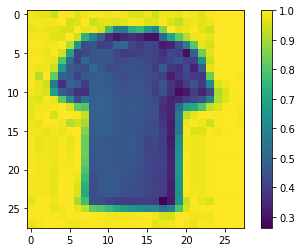

In [ ]:
import cv2
#read a custom image to be tested by the dataset
img = cv2.imread("images_resize-modified.jpg", 0) #since the image is grayscale, we need only one channel and the value '0' indicates just that

img_data = []

for i in range (img.shape[0]): #traverses through height of the image
    img_row = []
    for j in range (img.shape[1]): #traverses through width of the image
        img_row.append(img[i][j]/255.0)
    img_data.append(img_row)

print(img_data)
img_data = np.array(img_data)

plt.figure()
plt.imshow(img_data)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
my_imgs = np.array([img_data])
my_imgs.shape

predictions = probability_model.predict(my_imgs)

for i in range(10):
  print(class_names[i], " -> ", predictions[0][i])

1/1 [==============================] - 0s 22ms/step
T-shirt/top  ->  5.6593537e-05
Trouser  ->  0.00017736145
Pullover  ->  1.6245151e-07
Dress  ->  1.941499e-15
Coat  ->  1.0233606e-13
Sandal  ->  2.5623563e-09
Shirt  ->  0.054615103
Sneaker  ->  1.4583703e-12
Bag  ->  0.94515043
Ankle boot  ->  3.228319e-07
